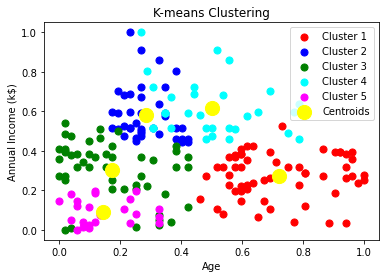

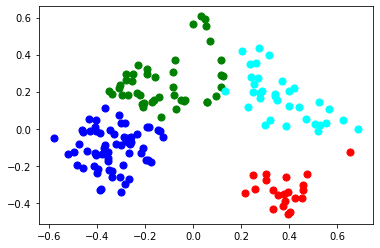

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
mall_data = pd.read_csv('C:/Users/User/Downloads/Mall_Customers.csv')

# Remove duplicates
mall_data.drop_duplicates(inplace=True)

# Remove missing values
mall_data.dropna(inplace=True)

# Convert Gender column to numerical using label encoding
mall_data['Genre'] = mall_data['Genre'].replace({'Male': 0, 'Female': 1})

# Scale the numerical features using Min-Max scaling
scaler = MinMaxScaler()
mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Perform K-means clustering
X = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(X.iloc[y_kmeans==0,0], X.iloc[y_kmeans==0,1], s=50, c='red', label='Cluster 1')
plt.scatter(X.iloc[y_kmeans==1,0], X.iloc[y_kmeans==1,1], s=50, c='blue', label='Cluster 2')
plt.scatter(X.iloc[y_kmeans==2,0], X.iloc[y_kmeans==2,1], s=50, c='green', label='Cluster 3')
plt.scatter(X.iloc[y_kmeans==3,0], X.iloc[y_kmeans==3,1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X.iloc[y_kmeans==4,0], X.iloc[y_kmeans==4,1], s=50, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('K-means Clustering')
plt.legend()
plt.show()

# Use PCA to improve the clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca)

# Visualize the clusters after PCA
plt.scatter(X_pca[y_kmeans_pca==0,0], X_pca[y_kmeans_pca==0,1], s=50, c='red', label='Cluster 1')
plt.scatter(X_pca[y_kmeans_pca==1,0], X_pca[y_kmeans_pca==1,1], s=50, c='blue', label='Cluster 2')
plt.scatter(X_pca[y_kmeans_pca==2,0], X_pca[y_kmeans_pca==2,1], s=50, c='green', label='Cluster 3')
plt.scatter(X_pca[y_kmeans_pca==3,0], X_pca[y_kmeans_pca==3,1], s=50, c='cyan', label='Cluster 4')

